In [93]:
#import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode
from scipy import stats
import warnings

In [94]:
warnings.filterwarnings('ignore')

In [2]:
# read csv file with pandas
data = pd.read_csv('fifa.csv', low_memory=False)

In [3]:
# call first 5 rows
data.head()

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,89,63,89,63,93,95,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,92,48,90,95,95,96,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,56,96,82,95,92,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,88,78,86,60,91,83,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,58,29,52,35,48,70,...,55,25,11,61,44,10,83,70,11,GK


In [4]:
# shape of dataset
data.shape

(17981, 39)

In [5]:
# check info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 17981 non-null  object
 1   Age                  17981 non-null  int64 
 2   Nationality          17981 non-null  object
 3   Overall              17981 non-null  int64 
 4   Acceleration         17981 non-null  object
 5   Aggression           17981 non-null  object
 6   Agility              17981 non-null  object
 7   Balance              17981 non-null  object
 8   Ball control         17981 non-null  object
 9   Composure            17981 non-null  object
 10  Crossing             17981 non-null  object
 11  Curve                17981 non-null  object
 12  Dribbling            17981 non-null  object
 13  Finishing            17981 non-null  object
 14  Free kick accuracy   17981 non-null  object
 15  GK diving            17981 non-null  object
 16  GK h

In [6]:
# check for missing value
data.isnull().sum().sum()

0

In [7]:
# change all column names to lower case for typing ease
data.columns = data.columns.str.lower()

In [8]:
# check the data types and total data type counts 
data.dtypes.value_counts()

object    37
int64      2
Name: count, dtype: int64

In [9]:
# call all columns to be formatted to int dtype
cols_num = (data.dtypes == 'O').index
cols_num = cols_num.drop(['name','preferred positions','nationality', 'overall','age'])
cols_num

Index(['acceleration', 'aggression', 'agility', 'balance', 'ball control',
       'composure', 'crossing', 'curve', 'dribbling', 'finishing',
       'free kick accuracy', 'gk diving', 'gk handling', 'gk kicking',
       'gk positioning', 'gk reflexes', 'heading accuracy', 'interceptions',
       'jumping', 'long passing', 'long shots', 'marking', 'penalties',
       'positioning', 'reactions', 'short passing', 'shot power',
       'sliding tackle', 'sprint speed', 'stamina', 'standing tackle',
       'strength', 'vision', 'volleys'],
      dtype='object')

In [10]:
# total all un-summeddata
for col in cols_num:
    data[col] = data[col].apply(lambda x : eval(x.strip()))

In [11]:
# remove all extra spaces in the object type columns
data[['name','preferred positions','nationality']] = data[['name','preferred positions','nationality']].applymap(str.strip)

In [12]:
# transform all latin, german, norwagian, etc. letters to english letters
data.name = data.name.apply(unidecode)

In [13]:
# get dummies for all plating postions in dataframe
data_pos = data['preferred positions'].str.get_dummies(sep = ' ')

In [14]:
# get all playing postions of the player
data['num of position'] = data['preferred positions'].apply(lambda x: len(x.split()))

# set the first postion as the most preferres position 
data['main position'] = data['preferred positions'].apply(lambda x: x.split()[0].strip())

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,17981.0,25.144541,4.614272,16.0,21.0,25.0,28.0,47.0
overall,17981.0,66.247984,6.987965,46.0,62.0,66.0,71.0,94.0
acceleration,17981.0,103.362327,984.877556,11.0,56.0,67.0,75.0,33270.0
aggression,17981.0,77.572938,767.663944,11.0,43.0,59.0,69.0,43130.0
agility,17981.0,98.081475,909.695941,14.0,55.0,65.0,74.0,30164.0
balance,17981.0,86.581225,751.287441,11.0,56.0,66.0,74.0,31472.0
ball control,17981.0,121.133530,1232.914608,8.0,53.0,63.0,69.0,43145.0
composure,17981.0,103.637506,1026.429722,5.0,51.0,60.0,67.0,27150.0
crossing,17981.0,86.470107,910.701596,5.0,38.0,54.0,64.0,27150.0
curve,17981.0,62.597631,622.736138,6.0,34.0,49.0,62.0,43131.0


In [16]:
# replace all outliers in the dataset with the median of players postion's category  
data_cleaned= data.copy()
for col in cols_num:
    data_cleaned[col] = data.groupby('main position')[col].transform(lambda x: x.median() if (x > 100).any() else x).astype('int')

In [17]:
data_cleaned.head()

,name,age,nationality,overall,acceleration,aggression,agility,balance,ball control,composure,...,sliding tackle,sprint speed,stamina,standing tackle,strength,vision,volleys,preferred positions,num of position,main position
0,Cristiano Ronaldo,32,Portugal,94,70,53,67,65,65,61,...,23,71,65,24,71,55,59,ST LW,2,ST
1,L. Messi,30,Argentina,93,92,48,90,95,95,60,...,26,76,73,28,59,58,85,RW,1,RW
2,Neymar,25,Brazil,92,94,56,96,82,95,92,...,29,77,66,31,53,62,83,LW,1,LW
3,L. Suarez,30,Uruguay,92,70,53,67,65,65,61,...,38,71,65,24,71,55,59,ST,1,ST
4,M. Neuer,31,Germany,92,40,29,38,43,20,70,...,11,41,31,10,62,35,11,GK,1,GK


In [18]:
data_cleaned.loc[data_cleaned['preferred positions'] == 'GK'].sort_values('overall',ascending = False)

,name,age,nationality,overall,acceleration,aggression,agility,balance,ball control,composure,...,sliding tackle,sprint speed,stamina,standing tackle,strength,vision,volleys,preferred positions,num of position,main position
4,M. Neuer,31,Germany,92,40,29,38,43,20,70,...,11,41,31,10,62,35,11,GK,1,GK
6,De Gea,26,Spain,90,40,38,38,43,20,64,...,13,41,31,21,62,35,13,GK,1,GK
12,T. Courtois,25,Belgium,89,40,23,38,43,20,52,...,16,41,31,18,62,35,12,GK,1,GK
18,G. Buffon,39,Italy,89,40,38,38,43,20,70,...,11,41,31,11,62,35,17,GK,1,GK
20,J. Oblak,24,Slovenia,88,40,34,38,43,20,55,...,18,41,31,12,62,35,13,GK,1,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17945,A. Dillon,20,Republic of Ireland,48,40,21,38,43,20,33,...,14,41,31,12,62,35,12,GK,1,GK
17949,M. McElhinney,19,Republic of Ireland,48,40,18,38,43,20,38,...,15,41,31,12,62,35,12,GK,1,GK
17951,M. Hurst,21,Scotland,48,40,20,38,43,20,27,...,16,41,31,15,62,35,14,GK,1,GK
17976,A. Kelsey,17,England,46,40,16,38,43,20,23,...,10,41,31,11,62,35,6,GK,1,GK


In [19]:
nga_players = data_cleaned[(data_cleaned['nationality'] == 'Nigeria')].sort_values(by = 'overall', ascending=False)
nga_players

,name,age,nationality,overall,acceleration,aggression,agility,balance,ball control,composure,...,sliding tackle,sprint speed,stamina,standing tackle,strength,vision,volleys,preferred positions,num of position,main position
506,V. Enyeama,34,Nigeria,80,40,39,38,43,20,24,...,11,41,31,12,62,35,11,GK,1,GK
653,V. Moses,26,Nigeria,79,75,54,75,73,67,61,...,38,75,68,40,60,61,53,LM RM RWB,3,LM
1188,O. Ndidi,20,Nigeria,77,66,63,67,69,66,62,...,57,66,71,60,65,63,47,CM CDM,2,CM
1359,A. Musa,24,Nigeria,76,75,54,75,73,67,61,...,38,75,68,40,60,61,53,LM ST,2,LM
1623,L. Balogun,29,Nigeria,75,71,66,66,52,61,72,...,65,71,71,66,68,49,36,RB CB,2,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16607,C. Egbuchulam,25,Nigeria,56,70,53,67,65,65,61,...,15,71,65,24,71,55,59,ST,1,ST
16752,F. Shomotun,20,Nigeria,55,76,54,75,73,67,61,...,38,76,69,40,60,64,36,RM CAM,2,RM
16961,I. Boye,20,Nigeria,55,70,53,67,65,65,61,...,17,71,65,24,71,55,59,ST,1,ST
17389,F. Onyeka,19,Nigeria,53,66,63,67,69,66,62,...,57,66,71,60,65,63,47,CM,1,CM


In [20]:
utility_NGA = data_cleaned[(data_cleaned['nationality'] == 'Nigeria')&(data_cleaned['num of position']>=3)]
utility_NGA.sort_values(by = 'overall', ascending=False)

,name,age,nationality,overall,acceleration,aggression,agility,balance,ball control,composure,...,sliding tackle,sprint speed,stamina,standing tackle,strength,vision,volleys,preferred positions,num of position,main position
653,V. Moses,26,Nigeria,79,75,54,75,73,67,61,...,38,75,68,40,60,61,53,LM RM RWB,3,LM
2198,S. Igboun,26,Nigeria,74,76,54,75,73,67,61,...,38,76,69,40,60,63,56,RM LM ST,3,RM
2278,Nosa,26,Nigeria,74,71,69,72,73,68,63,...,40,70,83,42,60,65,55,CAM CDM CM,3,CAM
2530,S. Aluko,28,Nigeria,74,70,53,67,65,65,61,...,35,71,65,24,71,55,59,ST CF RW,3,ST
2585,M. Simon,21,Nigeria,74,75,54,75,73,67,61,...,38,75,68,40,60,61,53,LM ST CF,3,LM
3078,I. Success,21,Nigeria,73,70,53,67,65,65,61,...,24,71,65,24,71,55,59,ST RM LM,3,ST
3202,P. Etebo,21,Nigeria,73,71,47,72,73,68,63,...,40,70,68,42,60,65,55,CAM ST LM,3,CAM
3216,R. Lawal,27,Nigeria,73,71,77,72,73,68,63,...,40,70,89,42,60,65,55,CAM CM CDM,3,CAM
4015,E. Echiejile,29,Nigeria,71,72,80,70,67,66,49,...,72,73,80,74,77,59,49,LWB LM LB,3,LWB
4194,S. Adegbenro,21,Nigeria,71,70,53,67,65,65,61,...,23,71,65,24,71,55,59,ST RW LW,3,ST


In [21]:
data_cleaned['nationality'].value_counts().head(10)

nationality
England        1630
Germany        1140
Spain          1019
France          978
Argentina       965
Brazil          812
Italy           799
Colombia        592
Japan           469
Netherlands     429
Name: count, dtype: int64

In [22]:
data_cleaned['nationality'].value_counts()<10

nationality
England      False
Germany      False
Spain        False
France       False
Argentina    False
             ...  
Fiji          True
Eritrea       True
Guatemala     True
Oman          True
Hong Kong     True
Name: count, Length: 165, dtype: bool

In [23]:
data_scores = data.drop(['main position', 'preferred positions','nationality','name'], axis = 1)
country_data = data['nationality'].str.get_dummies()

In [24]:
data_4_model = pd.concat([data_scores,country_data,data_pos],axis = 1)
data_4_model.head()

,age,overall,acceleration,aggression,agility,balance,ball control,composure,crossing,curve,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,32,94,89,63,89,63,93,95,85,81,...,0,0,0,1,0,0,0,0,0,1
1,30,93,92,48,90,95,95,96,77,89,...,0,0,0,0,0,0,0,1,0,0
2,25,92,94,56,96,82,95,92,75,81,...,0,0,0,1,0,0,0,0,0,0
3,30,92,88,78,86,60,91,83,77,86,...,0,0,0,0,0,0,0,0,0,1
4,31,92,58,29,52,35,48,70,15,14,...,1,0,0,0,0,0,0,0,0,0


In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
import sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
X = data_4_model.drop(['overall'], axis = 1)
y =  data_4_model['overall']
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.3,shuffle=True)

In [84]:
pipe =([('ss', StandardScaler()),('lr',RandomForestRegressor(random_state = 12, bootstrap=False))])

In [85]:
Pipe = Pipeline(pipe)

In [86]:
Pipe.fit(train_X,train_y)

Pipeline(steps=[('ss', StandardScaler()),
                ('lr',
                 RandomForestRegressor(bootstrap=False, random_state=12))])

In [87]:
Pipe.score(train_X,train_y)

1.0

In [83]:
Pipe.score(test_X,test_y)

0.9549540925846743

In [45]:
y_pred = Pipe.predict(test_X)

In [174]:
pd.Series(y_pred.round())

0       64.0
1       64.0
2       58.0
3       65.0
4       64.0
        ... 
5390    73.0
5391    63.0
5392    70.0
5393    66.0
5394    71.0
Length: 5395, dtype: float64

In [182]:
pd.concat([pd.Series(test_y,name= 'true y').reset_index(drop =True),pd.Series(y_pred.round(), name="Predicted y")],axis = 1).astype(int).sample(10)

,true y,Predicted y
182,72,73
1785,55,55
2341,75,75
2883,59,59
3563,70,70
1616,72,70
726,67,67
4596,75,75
594,71,70
5240,75,76


<AxesSubplot:xlabel='overall', ylabel='Density'>

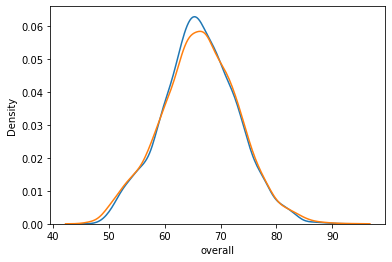

In [183]:
sns.distplot(y_pred,hist = False)
sns.distplot(test_y,hist = False)

In [109]:
rfr = Pipe.named_steps['lr']

In [123]:
feature_importance = pd.DataFrame(zip(Pipe.feature_names_in_,rfr.feature_importances_)).rename(columns = {0:'feature',1:'importance'})
feature_importance = feature_importance.sort_values(by ='importance',ascending=False).reset_index(drop = True)

Text(0.5, 1.0, 'Top 20 feature importances of model')

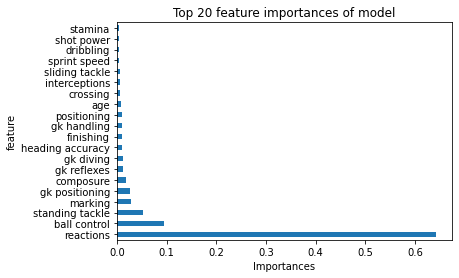

In [155]:
ax = feature_importance.iloc[:20,:].plot.barh(x ='feature', y= 'importance', legend = False)
ax.set_xlabel('Importances')
ax.set_title('Top 20 feature importances of model')

### Hypothesis Testing
H<i><sub>1</sub> : The number of positions of a player affects the overall performance</i> 

In [ ]:
pd.crosstab(data['overall'],data['num of position'], margins = True).reset_index()